In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

# 0 한글 폰트

In [0]:
import matplotlib.font_manager as fm

!apt-get install fonts-nanum
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

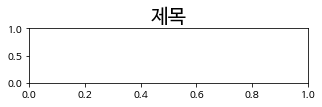

In [3]:
plt.figure(figsize=(5,1))
plt.title('제목', fontsize=20)
plt.show()

# 1. 데이터 불러오기

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
folder = "Colab Notebooks/dacon"
project_dir = "temperature_forecasting"
data_folder = "_data/data_dacon"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
data_path = base_path / data_folder / project_dir
os.chdir(project_path)

print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/My Drive/Colab Notebooks/dacon/temperature_forecasting


In [6]:
df = pd.read_csv(os.path.join(data_path,'train.csv'))
df.shape

(4752, 60)

In [0]:
n = 4320

- train
    - 4320개(30일)
    - 432개(3일) 
- test
    - 11520개  
    
|-|30일(train)|3일(train)|80일(test)|
|---|---|---|---|
|Y18|NULL|432개|NULL|
|Y00-Y17|4320개|NULL|NULL|
|X00-X17|4320개|432개|11520개|

# 2 데이터 살펴보기

## 데이터 보기

In [8]:
df.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [9]:
df.tail(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4751,4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,1007.4,2.5,23.88,96.2,0.0,0.0,237.2,0.0,17.7,0.0,0.0,93.0,10.5,1000.3,1007.6,0.0,0.0,0.1,1006.1,23.2,999.5,89.6,17.7,19.5,1007.7,22.16,157.5,0.0,84.0,59.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


## id

In [10]:
pd.DataFrame(df['id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      4752 non-null   int64
dtypes: int64(1)
memory usage: 37.2 KB


In [11]:
df['id'].describe()

count    4752.00000
mean     2375.50000
std      1371.92857
min         0.00000
25%      1187.75000
50%      2375.50000
75%      3563.25000
max      4751.00000
Name: id, dtype: float64

## x

* feat_temp: 기온 
* feat_air_press: 현지기압
* feat_wind_speed: 풍속
* feat_rainfall: 일일 누적강수량 
* feat_sea_press: 해면기압
* feat_insol: 일일 누적일사량
* feat_humid: 습도
* feat_dir_wind: 풍향



In [0]:
feat_x = ['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 
          'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 
          'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 
          'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39']
feat_temp = ['X00', 'X07', 'X28', 'X31', 'X32']
feat_air_press = ['X01', 'X06', 'X22', 'X27', 'X29']
feat_wind_speed = ['X02', 'X03', 'X18', 'X24', 'X26']
feat_rainfall = ['X04', 'X10', 'X21', 'X36', 'X39']
feat_sea_press = ['X05', 'X08', 'X09', 'X23', 'X33']
feat_insol = ['X11', 'X14', 'X16', 'X19', 'X34']
feat_humid = ['X12', 'X20', 'X30', 'X37', 'X38']
feat_dir_wind = ['X13', 'X15', 'X17', 'X25', 'X35']

### 기온
- 5군데 모두 비슷한 패턴을 보임.
- 상관계수 또한 0.9를 넘음. 높은 선형 상관관계를 가짐을 알 수 있음. 
    - X07, X28 : 0.981081 
    - X31, X32 : 0.979312

In [13]:
x_col = feat_temp
df[x_col].describe()

,X00,X07,X28,X31,X32
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,20.227904,21.658081,22.079040,19.846528,20.012984
std,4.707570,4.377216,4.225203,5.520259,5.271630
min,8.300000,11.600000,10.300000,5.300000,5.500000
25%,16.900000,18.400000,19.000000,16.000000,16.300000
50%,19.900000,21.200000,21.700000,19.400000,19.600000
75%,24.100000,24.825000,25.200000,24.100000,24.100000
max,30.900000,32.700000,33.200000,33.100000,32.900000


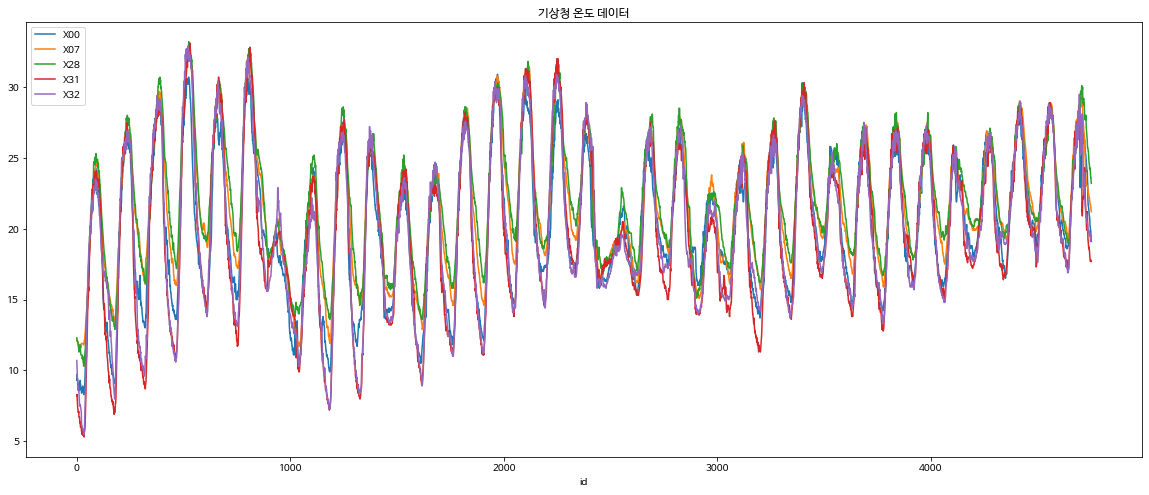

In [14]:
df.plot(x='id', y=x_col, figsize=(20,8), title='기상청 온도 데이터')

In [15]:
df[x_col].corr()

,X00,X07,X28,X31,X32
X00,1.000000,0.957922,0.941699,0.961053,0.963055
X07,0.957922,1.000000,0.981081,0.954865,0.962826
X28,0.941699,0.981081,1.000000,0.935156,0.938572
X31,0.961053,0.954865,0.935156,1.000000,0.979312
X32,0.963055,0.962826,0.938572,0.979312,1.000000


Text(0.5, 1.0, '기상청 온도 데이터 상관계수')

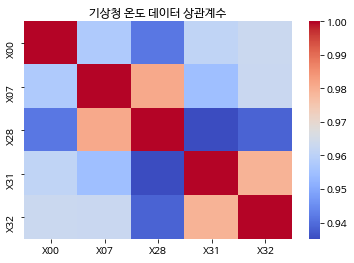

In [16]:
sns.heatmap(df[x_col].corr(), cmap='coolwarm').set_title('기상청 온도 데이터 상관계수')

#### 30일 평균 온도와 3일 평균 온도 차이 
- 30일 평균 온도와 그 이후 3일 평균 온도는 대략 2.6도정도 차이남. 

In [17]:
df[x_col][:n].describe()

,X00,X07,X28,X31,X32
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,19.965602,21.437014,21.898565,19.603796,19.750347
std,4.745137,4.423139,4.275935,5.612736,5.345214
min,8.300000,11.600000,10.300000,5.300000,5.500000
25%,16.500000,18.100000,18.700000,15.700000,16.000000
50%,19.500000,20.900000,21.600000,19.100000,19.200000
75%,23.800000,24.600000,25.000000,23.900000,23.900000
max,30.900000,32.700000,33.200000,33.100000,32.900000


In [18]:
df[x_col][n:].describe()

,X00,X07,X28,X31,X32
count,432.000000,432.000000,432.000000,432.000000,432.000000
mean,22.850926,23.868750,23.883796,22.273843,22.639352
std,3.326899,3.125128,3.159241,3.705534,3.524311
min,16.500000,19.200000,19.000000,16.400000,16.900000
25%,20.000000,21.000000,20.975000,19.175000,19.500000
50%,22.900000,23.150000,23.700000,21.600000,21.800000
75%,25.700000,27.000000,26.925000,25.900000,26.000000
max,28.900000,29.700000,30.100000,28.900000,29.500000


In [19]:
df[x_col][n:].mean()-df[x_col][:n].mean()

X00    2.885324
X07    2.431736
X28    1.985231
X31    2.670046
X32    2.889005
dtype: float64

In [20]:
sum(df[x_col][n:].mean()-df[x_col][:n].mean())/5

2.5722685185185363

### 평균 온도
5군데의 평균 온도 

In [0]:
df_temp = df[x_col].mean(axis=1)

### 현지기압
- 5군데의 현지 기압은 서로 0.98이 넘는 매우 높은 상관계수를 갖음.
- 평균 온도 df_temp와의 현지 기압의 상관관계는 낮음. 


In [22]:
x_col = feat_air_press
df[x_col].describe()

,X01,X06,X22,X27,X29
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,988.621107,989.005093,1001.773190,1007.554924,1000.811932
std,3.359916,3.403714,3.367735,3.446475,3.390206
min,977.300000,978.100000,990.800000,997.200000,989.700000
25%,986.800000,987.100000,999.900000,1005.500000,998.900000
50%,988.600000,989.100000,1001.900000,1007.700000,1000.900000
75%,991.000000,991.600000,1004.200000,1010.200000,1003.400000
max,997.200000,997.400000,1010.100000,1015.400000,1009.000000


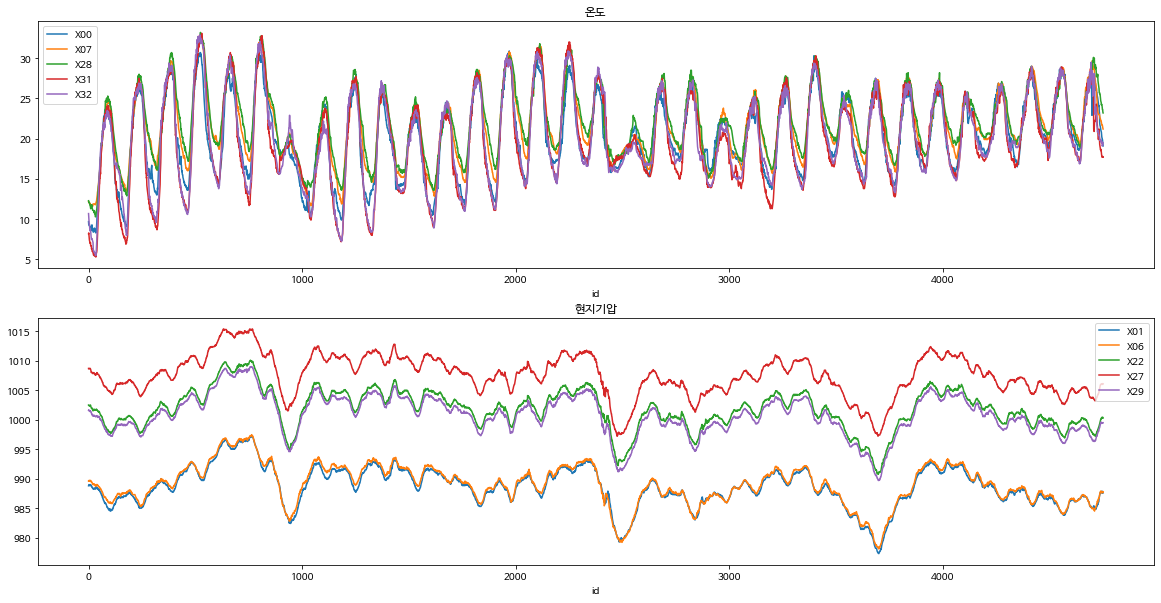

In [23]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
df.plot(x='id', y=feat_temp, ax=ax1, title='온도')
df.plot(x='id', y=x_col, ax=ax2, title='현지기압')
plt.show()

In [24]:
df[x_col].corr()

,X01,X06,X22,X27,X29
X01,1.000000,0.995284,0.996746,0.987752,0.996157
X06,0.995284,1.000000,0.994807,0.995303,0.997819
X22,0.996746,0.994807,1.000000,0.991352,0.997923
X27,0.987752,0.995303,0.991352,1.000000,0.995237
X29,0.996157,0.997819,0.997923,0.995237,1.000000


Text(0.5, 1.0, '기상청 현지기압 데이터 상관계수')

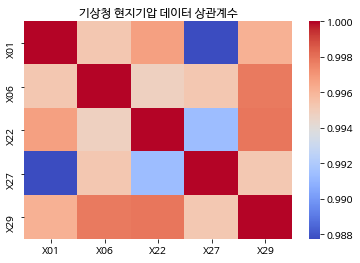

In [25]:
sns.heatmap(df[x_col].corr(), cmap='coolwarm').set_title('기상청 현지기압 데이터 상관계수')

In [26]:
df[x_col].corrwith(df_temp, axis = 0) 

X01   -0.088872
X06   -0.092819
X22   -0.100592
X27   -0.082688
X29   -0.092470
dtype: float64

### 풍속
- 다른 종류에 비해서 5군데의 풍속 상관계수는 낮은 편임. 

In [27]:
x_col = feat_wind_speed
df[x_col].describe()

,X02,X03,X18,X24,X26
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,1.509764,1.453157,1.377462,0.985059,1.369886
std,1.071858,0.936151,1.155024,1.091314,1.240900
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,0.800000,0.500000,0.000000,0.300000
50%,1.300000,1.300000,1.000000,0.700000,1.100000
75%,2.100000,2.000000,2.100000,1.700000,2.100000
max,10.200000,5.800000,8.900000,6.000000,6.800000


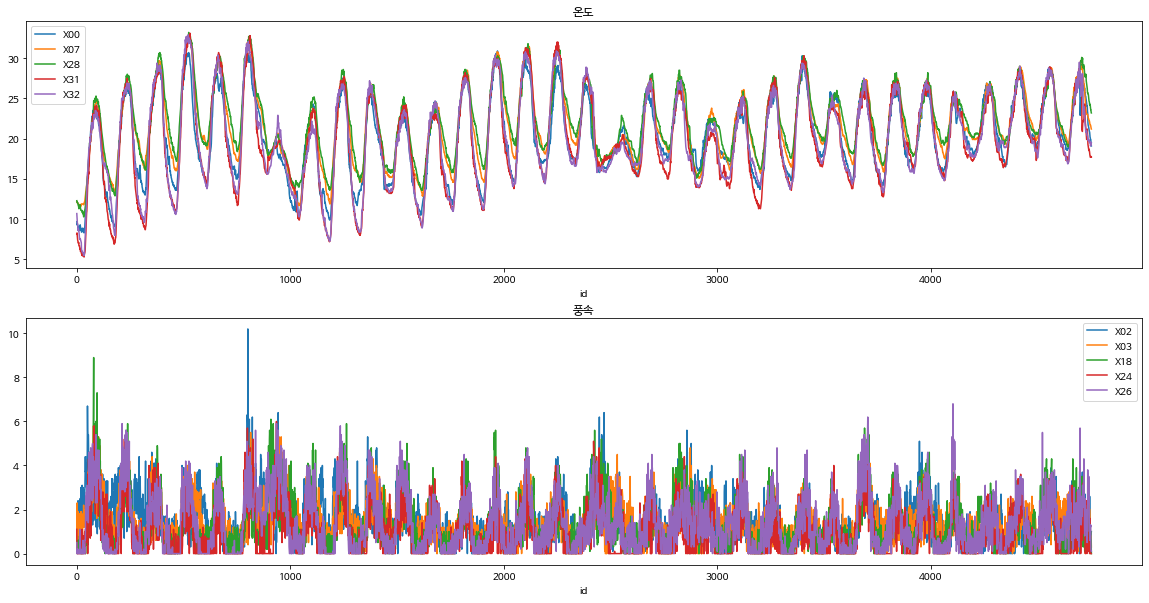

In [28]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
df.plot(x='id', y=feat_temp, ax=ax1, title='온도')
df.plot(x='id', y=x_col, ax=ax2, title='풍속')

In [29]:
df[x_col].corr()

,X02,X03,X18,X24,X26
X02,1.000000,0.384300,0.357250,0.417393,0.400025
X03,0.384300,1.000000,0.481811,0.500993,0.537470
X18,0.357250,0.481811,1.000000,0.607754,0.623131
X24,0.417393,0.500993,0.607754,1.000000,0.634738
X26,0.400025,0.537470,0.623131,0.634738,1.000000


Text(0.5, 1.0, '기상청 풍속 데이터 상관계수')

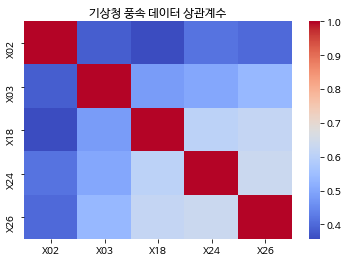

In [30]:
sns.heatmap(df[x_col].corr(), cmap='coolwarm').set_title('기상청 풍속 데이터 상관계수')

In [31]:
df[x_col].corrwith(df_temp, axis = 0) 

X02    0.197659
X03    0.391478
X18    0.522367
X24    0.563346
X26    0.590137
dtype: float64

### 일일 누적강수량

In [32]:
x_col = feat_rainfall
df[x_col].describe()

,X04,X10,X21,X36,X39
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,1.270223,1.006734,1.138363,1.533817,1.083123
std,4.429852,3.324415,4.079039,5.578607,4.617366
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.600000,18.500000,21.000000,33.600000,28.000000


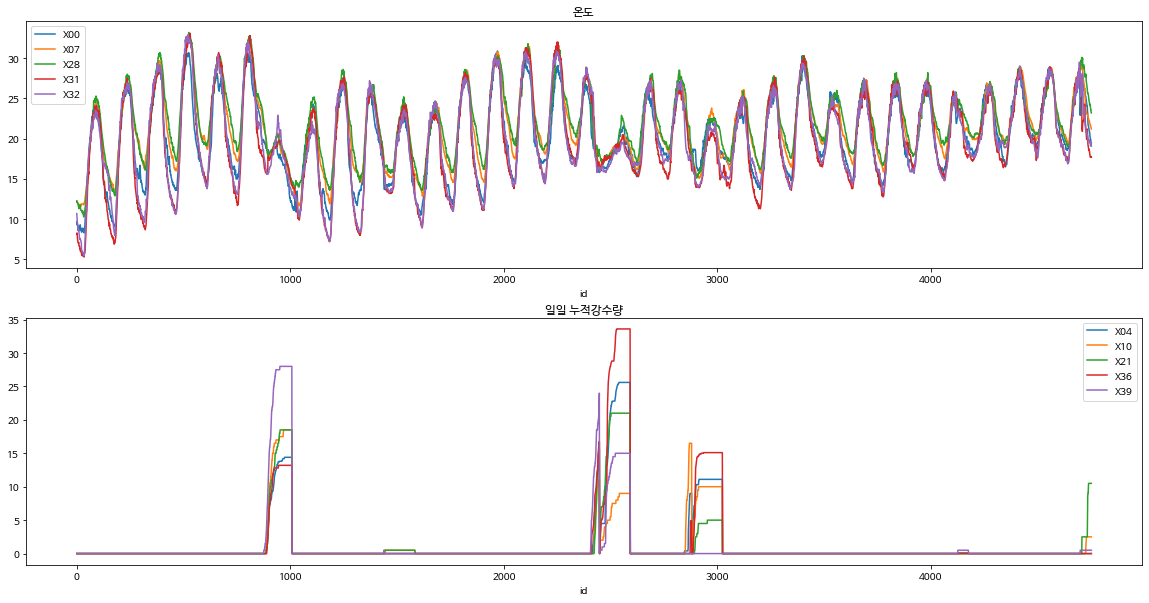

In [33]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
df.plot(x='id', y=feat_temp, ax=ax1, title='온도')
df.plot(x='id', y=x_col, ax=ax2, title='일일 누적강수량')

In [34]:
df[x_col].corr()

,X04,X10,X21,X36,X39
X04,1.000000,0.815176,0.934104,0.986345,0.747254
X10,0.815176,1.000000,0.796809,0.740117,0.813190
X21,0.934104,0.796809,1.000000,0.904654,0.868231
X36,0.986345,0.740117,0.904654,1.000000,0.676623
X39,0.747254,0.813190,0.868231,0.676623,1.000000


Text(0.5, 1.0, '기상청 누적 강수량 데이터 상관계수')

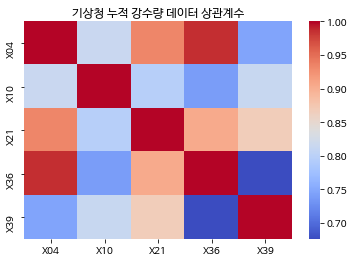

In [35]:
sns.heatmap(df[x_col].corr(), cmap='coolwarm').set_title('기상청 누적 강수량 데이터 상관계수')

In [36]:
df[x_col].corrwith(df_temp, axis = 0) 

X04   -0.137223
X10   -0.152258
X21   -0.133570
X36   -0.125799
X39   -0.124837
dtype: float64

### 해면기압

In [37]:
x_col = feat_sea_press
df[x_col].describe()

,X05,X08,X09,X23,X33
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,1008.333902,1008.790341,1008.394171,1008.850989,1009.074747
std,3.395037,3.520317,3.546180,3.417633,3.440669
min,997.200000,997.300000,996.300000,997.500000,998.700000
25%,1006.500000,1006.700000,1006.300000,1006.900000,1007.075000
50%,1008.500000,1008.800000,1008.400000,1008.900000,1009.200000
75%,1010.800000,1011.400000,1010.900000,1011.400000,1011.700000
max,1016.800000,1017.500000,1018.000000,1017.100000,1016.800000


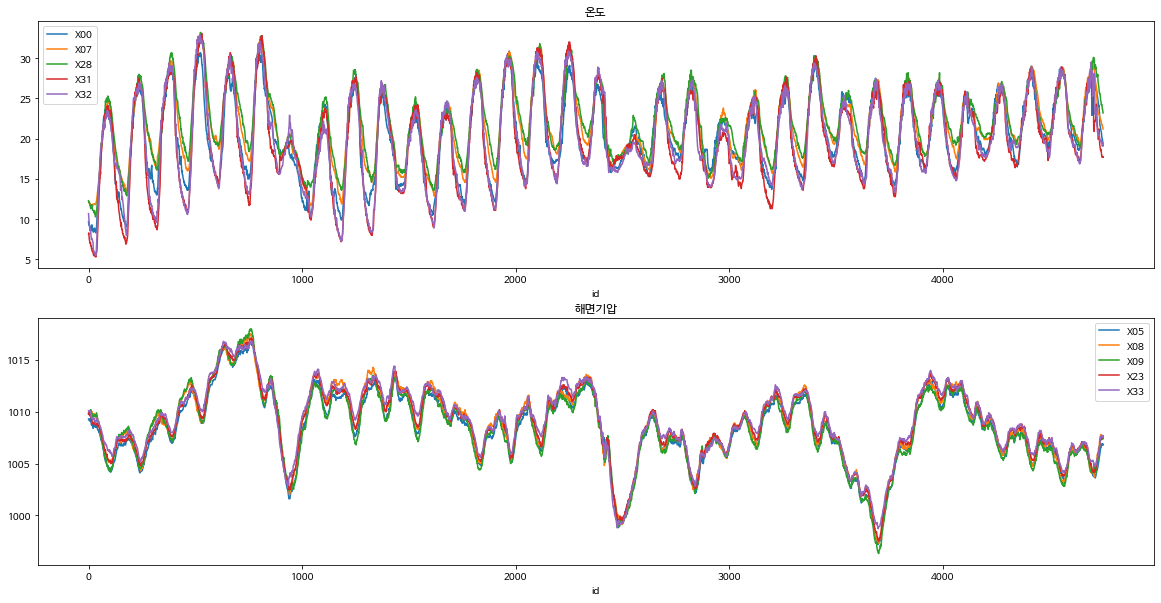

In [38]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
df.plot(x='id', y=feat_temp, ax=ax1, title='온도')
df.plot(x='id', y=x_col, ax=ax2, title='해면기압')

In [39]:
df[x_col].corr()

,X05,X08,X09,X23,X33
X05,1.000000,0.991330,0.989875,0.997819,0.990969
X08,0.991330,1.000000,0.991651,0.994129,0.988586
X09,0.989875,0.991651,1.000000,0.988561,0.977810
X23,0.997819,0.994129,0.988561,1.000000,0.994468
X33,0.990969,0.988586,0.977810,0.994468,1.000000


Text(0.5, 1.0, '기상청 해면기압 데이터 상관계수')

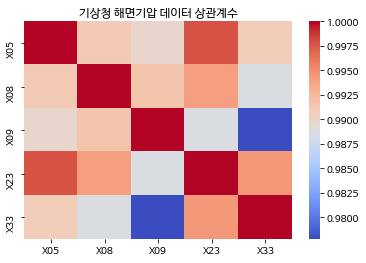

In [40]:
sns.heatmap(df[x_col].corr(), cmap='coolwarm').set_title('기상청 해면기압 데이터 상관계수')

In [41]:
df[x_col].corrwith(df_temp, axis = 0) 

X05   -0.128967
X08   -0.202609
X09   -0.201626
X23   -0.129815
X33   -0.093756
dtype: float64

### 일일 누적일사량

- X14, 16, 19는 일사량이 전부 0: 실내일 가능성 있음. 해당 컬럼은 사용하지 않을 것.

In [42]:
x_col = feat_insol
df[feat_insol].describe()

,X11,X14,X16,X19,X34
count,4752.000000,4752.0,4752.0,4752.0,4752.000000
mean,11.008479,0.0,0.0,0.0,11.567563
std,10.873539,0.0,0.0,0.0,11.386727
min,0.000000,0.0,0.0,0.0,0.000000
25%,0.020000,0.0,0.0,0.0,0.030000
50%,7.690000,0.0,0.0,0.0,8.210000
75%,22.190000,0.0,0.0,0.0,22.562500
max,30.700000,0.0,0.0,0.0,32.240000


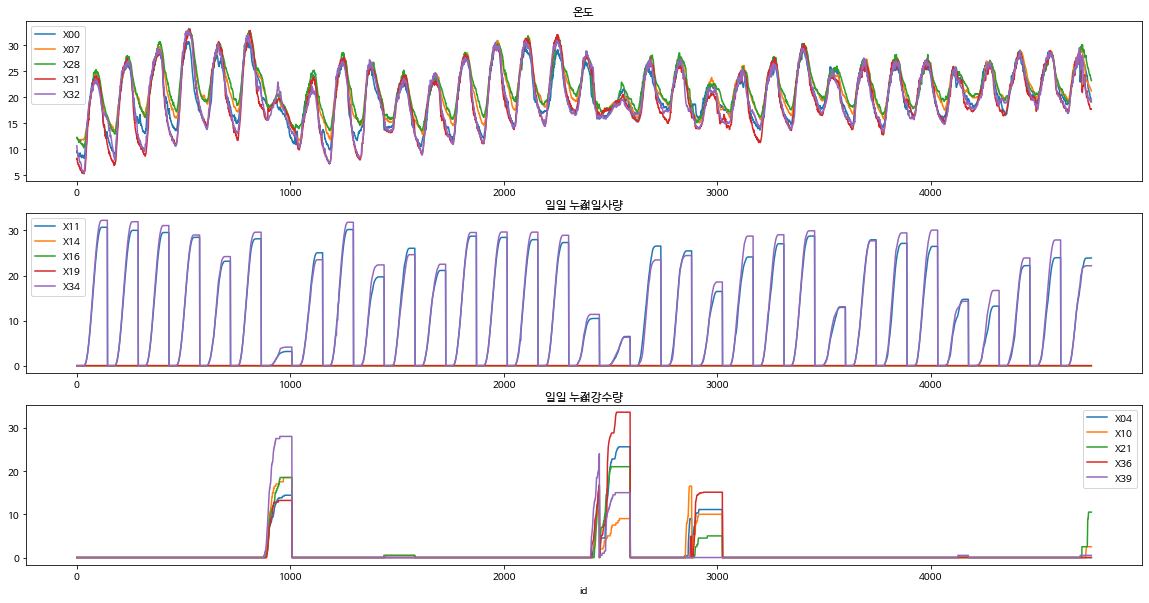

In [43]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
df.plot(x='id', y=feat_temp, ax=ax1, title='온도')
df.plot(x='id', y=x_col, ax=ax2, title='일일 누적일사량')
df.plot(x='id', y=feat_rainfall, ax=ax3, title='일일 누적강수량')


In [44]:
df[x_col].corr()

,X11,X14,X16,X19,X34
X11,1.000000,NaN,NaN,NaN,0.995187
X14,NaN,NaN,NaN,NaN,NaN
X16,NaN,NaN,NaN,NaN,NaN
X19,NaN,NaN,NaN,NaN,NaN
X34,0.995187,NaN,NaN,NaN,1.000000


Text(0.5, 1.0, '기상청 일일 누적 일사량 데이터 상관계수')

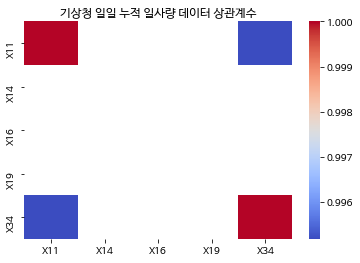

In [45]:
sns.heatmap(df[x_col].corr(), cmap='coolwarm').set_title('기상청 일일 누적 일사량 데이터 상관계수')

X14, X16, X19 열 삭제하기 

In [0]:
remove_col =  ['X14', 'X16', 'X19']

In [0]:
for r in remove_col:
    feat_insol.remove(r)
    feat_x.remove(r)

In [0]:
df = df.drop(remove_col, axis = 1)

In [49]:
df[x_col].corrwith(df_temp, axis = 0) 

X11    0.581810
X34    0.588748
dtype: float64

### 습도
- 습도의 상관계수는 0.85 이상으로 높은 편임
- 온도와 음의 상관관계를 보임

In [50]:
x_col = feat_humid
df[x_col].describe()

,X12,X20,X30,X37,X38
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,68.209827,71.478872,65.657639,65.918771,58.178704
std,22.278053,21.830446,21.525699,19.527173,18.368285
min,16.400000,19.700000,17.400000,17.500000,17.900000
25%,49.500000,53.075000,48.075000,51.500000,44.600000
50%,72.150000,74.200000,69.400000,67.300000,59.100000
75%,89.025000,92.600000,85.600000,81.900000,72.700000
max,97.900000,97.900000,97.200000,97.800000,94.800000


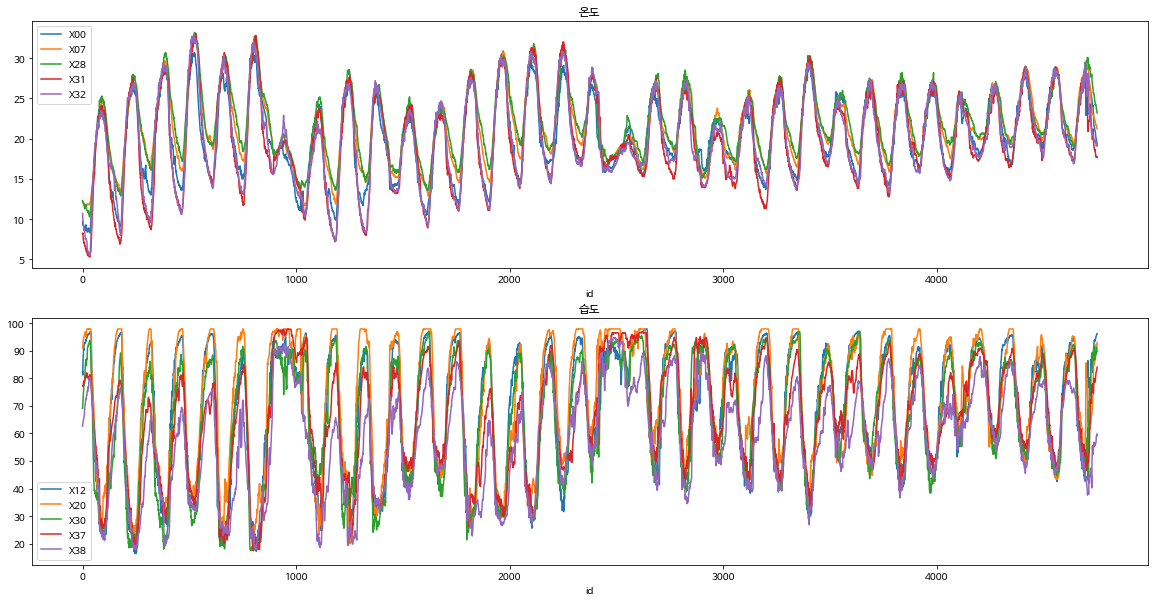

In [51]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
df.plot(x='id', y=feat_temp, ax=ax1, title='온도')
df.plot(x='id', y=x_col, ax=ax2, title='습도')

In [52]:
df[x_col].corr()

,X12,X20,X30,X37,X38
X12,1.000000,0.937239,0.952855,0.908078,0.853899
X20,0.937239,1.000000,0.928021,0.900590,0.855513
X30,0.952855,0.928021,1.000000,0.921706,0.851052
X37,0.908078,0.900590,0.921706,1.000000,0.931389
X38,0.853899,0.855513,0.851052,0.931389,1.000000


Text(0.5, 1.0, '기상청 습도 데이터 상관계수')

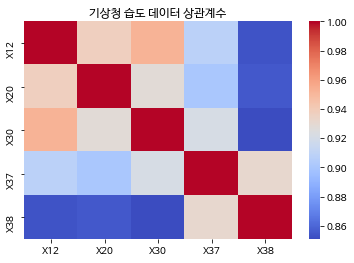

In [53]:
sns.heatmap(df[x_col].corr(), cmap='coolwarm').set_title('기상청 습도 데이터 상관계수')

In [54]:
df[x_col].corrwith(df_temp, axis = 0) 

X12   -0.816536
X20   -0.815188
X30   -0.791681
X37   -0.721040
X38   -0.638782
dtype: float64

### 풍향
- 다른 종류에 비해서 5군데의 풍향 상관계수는 매우 낮은 편임. 

In [55]:
x_col = feat_dir_wind
df[x_col].describe()

,X13,X15,X17,X25,X35
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,161.357639,174.346654,161.823864,139.524453,208.400505
std,98.787460,97.785811,115.943382,131.438036,99.580562
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.225000,115.600000,33.875000,0.000000,155.300000
50%,182.600000,170.250000,190.450000,134.150000,240.850000
75%,228.925000,258.400000,253.125000,270.900000,277.800000
max,360.000000,359.900000,360.000000,359.900000,359.900000


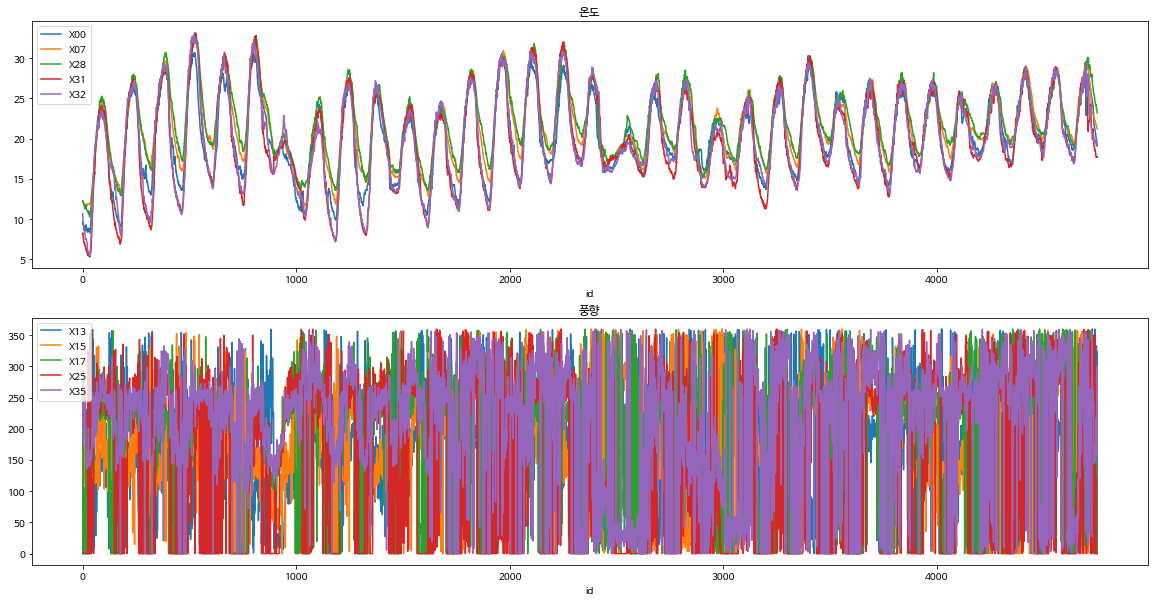

In [56]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
df.plot(x='id', y=feat_temp, ax=ax1, title='온도')
df.plot(x='id', y=x_col, ax=ax2, title='풍향')

In [57]:
df[x_col].corr()

,X13,X15,X17,X25,X35
X13,1.000000,0.120568,-0.003977,0.029207,0.053072
X15,0.120568,1.000000,0.133061,0.144404,0.093405
X17,-0.003977,0.133061,1.000000,0.354239,0.205332
X25,0.029207,0.144404,0.354239,1.000000,0.303246
X35,0.053072,0.093405,0.205332,0.303246,1.000000


Text(0.5, 1.0, '기상청 풍향 데이터 상관계수')

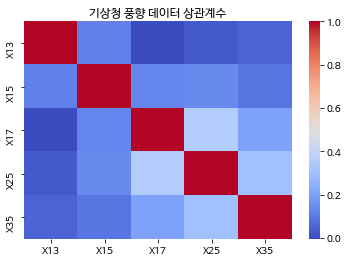

In [58]:
sns.heatmap(df[x_col].corr(), cmap='coolwarm').set_title('기상청 풍향 데이터 상관계수')

In [59]:
df[x_col].corrwith(df_temp, axis = 0) 

X13    0.002683
X15    0.220681
X17    0.455893
X25    0.479688
X35    0.258278
dtype: float64

## y

### feat_y

In [0]:
feat_y = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']

In [61]:
df[feat_y].shape

(4752, 18)

null 값이 없는 부분만 추출 

In [62]:
df_y = df[feat_y][:n]
df_y.shape 

(4320, 18)

In [63]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y00     4320 non-null   float64
 1   Y01     4320 non-null   float64
 2   Y02     4320 non-null   float64
 3   Y03     4320 non-null   float64
 4   Y04     4320 non-null   float64
 5   Y05     4320 non-null   float64
 6   Y06     4320 non-null   float64
 7   Y07     4320 non-null   float64
 8   Y08     4320 non-null   float64
 9   Y09     4320 non-null   float64
 10  Y10     4320 non-null   float64
 11  Y11     4320 non-null   float64
 12  Y12     4320 non-null   float64
 13  Y13     4320 non-null   float64
 14  Y14     4320 non-null   float64
 15  Y15     4320 non-null   float64
 16  Y16     4320 non-null   float64
 17  Y17     4320 non-null   float64
dtypes: float64(18)
memory usage: 607.6 KB


In [64]:
df_y.describe().round(1)

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
count,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0,4320.0
mean,21.3,23.7,23.6,24.5,24.5,24.2,22.5,23.8,24.0,22.2,23.7,24.6,23.6,20.9,21.3,21.6,23.0,23.4
std,4.3,7.6,7.4,3.3,3.4,8.6,7.5,8.7,9.8,9.1,10.6,12.2,8.4,6.1,7.1,6.8,8.1,9.3
min,11.5,7.0,7.0,16.0,15.5,7.5,6.5,7.5,7.0,3.5,4.0,3.0,6.0,7.5,7.5,7.0,6.0,7.0
25%,18.0,17.5,17.5,22.0,22.0,17.5,16.5,17.0,17.0,15.5,15.5,15.0,17.0,16.5,16.5,16.5,16.5,16.0
50%,21.0,22.0,22.0,24.5,24.5,22.0,21.0,21.5,21.0,20.0,20.5,21.0,22.0,19.5,19.5,20.0,21.5,20.0
75%,24.5,30.0,29.5,27.0,27.0,30.0,28.5,29.5,29.0,30.5,32.5,34.5,30.5,25.0,25.0,27.0,30.0,32.0
max,32.0,40.5,39.5,32.0,33.0,53.0,45.0,52.0,54.5,42.0,49.0,53.0,43.5,38.0,42.5,40.5,41.5,43.5


### y correlation

y를 비슷한 것끼리 그룹화 해보기 

In [65]:
df_y.corr().round(3)

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
Y00,1.000,0.945,0.947,0.921,0.920,0.818,0.690,0.586,0.837,0.851,0.870,0.844,0.663,0.910,0.898,0.827,0.799,0.798
Y01,0.945,1.000,0.996,0.807,0.808,0.913,0.800,0.700,0.933,0.954,0.968,0.960,0.786,0.967,0.943,0.920,0.909,0.920
Y02,0.947,0.996,1.000,0.804,0.805,0.912,0.814,0.719,0.928,0.956,0.965,0.960,0.796,0.965,0.936,0.927,0.913,0.921
Y03,0.921,0.807,0.804,1.000,0.997,0.612,0.437,0.323,0.661,0.639,0.677,0.639,0.404,0.738,0.757,0.606,0.564,0.570
Y04,0.920,0.808,0.805,0.997,1.000,0.612,0.436,0.323,0.661,0.639,0.677,0.638,0.403,0.737,0.760,0.604,0.563,0.572
Y05,0.818,0.913,0.912,0.612,0.612,1.000,0.840,0.765,0.959,0.939,0.934,0.946,0.848,0.945,0.916,0.910,0.948,0.925
Y06,0.690,0.800,0.814,0.437,0.436,0.840,1.000,0.965,0.759,0.907,0.866,0.871,0.981,0.815,0.721,0.925,0.942,0.909
Y07,0.586,0.700,0.719,0.323,0.323,0.765,0.965,1.000,0.664,0.829,0.776,0.787,0.957,0.715,0.627,0.855,0.874,0.852
Y08,0.837,0.933,0.928,0.661,0.661,0.959,0.759,0.664,1.000,0.931,0.941,0.951,0.765,0.966,0.954,0.894,0.909,0.918
Y09,0.851,0.954,0.956,0.639,0.639,0.939,0.907,0.829,0.931,1.000,0.991,0.987,0.894,0.960,0.904,0.976,0.970,0.980


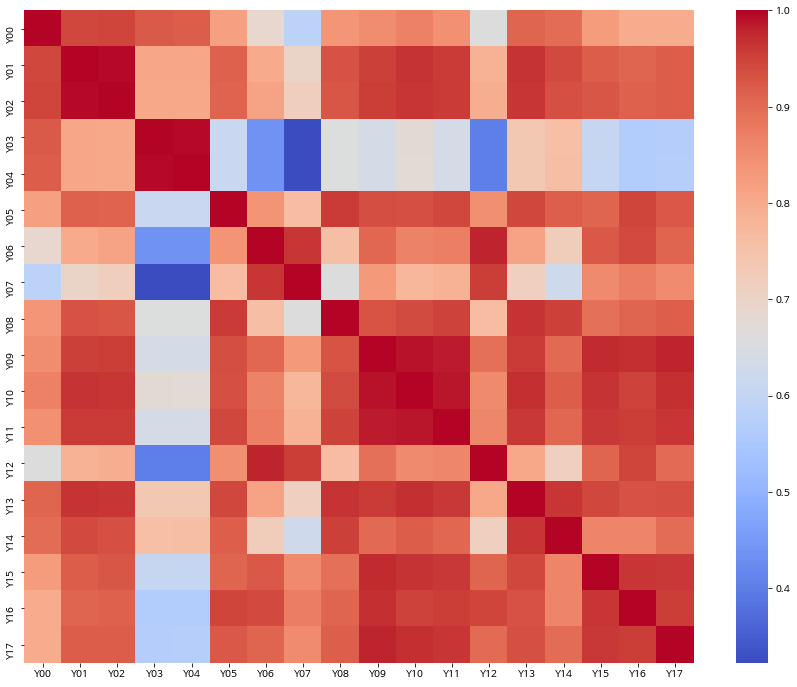

In [66]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(df_y.corr(), cmap='coolwarm')

순서 바꿔서 보기 

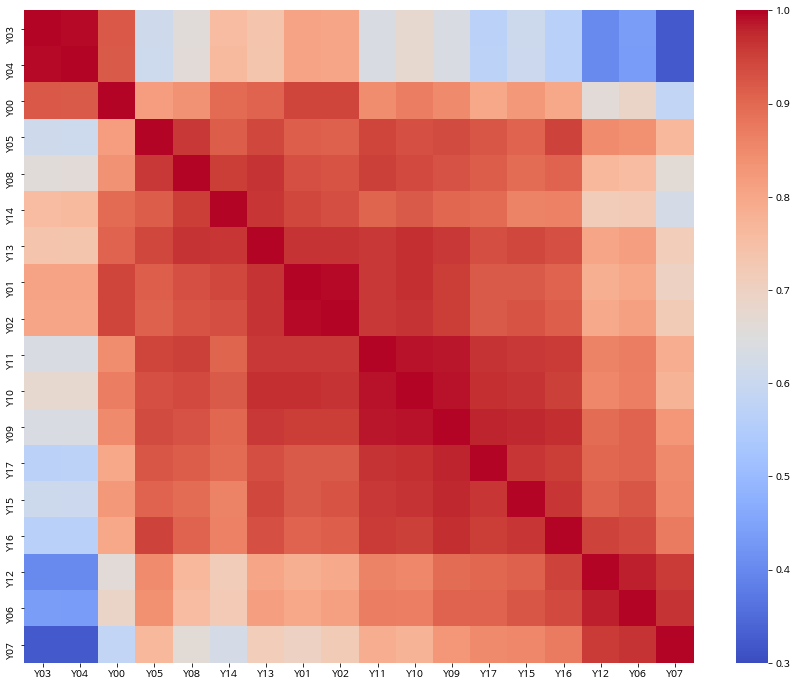

In [67]:
df_y_ = df_y[['Y03', 'Y04', 'Y00', 'Y05', 'Y08', 'Y14',  'Y13','Y01', 'Y02',  'Y11', 'Y10','Y09',  'Y17', 'Y15', 'Y16', 'Y12', 'Y06', 'Y07']]

plt.figure(figsize=(15,12))
ax = sns.heatmap(df_y_.corr(), cmap='coolwarm', vmin = 0.3) # 명확하게 보기 위해 vmin 지정해 보았음

In [68]:
pd.DataFrame(df_y_.corr()>0.965, dtype=int)*111

,Y03,Y04,Y00,Y05,Y08,Y14,Y13,Y01,Y02,Y11,Y10,Y09,Y17,Y15,Y16,Y12,Y06,Y07
Y03,111,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Y04,111,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Y00,0,0,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Y05,0,0,0,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Y08,0,0,0,0,111,0,111,0,0,0,0,0,0,0,0,0,0,0
Y14,0,0,0,0,0,111,0,0,0,0,0,0,0,0,0,0,0,0
Y13,0,0,0,0,111,0,111,111,111,0,111,0,0,0,0,0,0,0
Y01,0,0,0,0,0,0,111,111,111,0,111,0,0,0,0,0,0,0
Y02,0,0,0,0,0,0,111,111,111,0,111,0,0,0,0,0,0,0
Y11,0,0,0,0,0,0,0,0,0,111,111,111,0,0,0,0,0,0


6개의 그룹으로 나눠보기로 한다. 

'Y03', 'Y04'  
'Y00'  
'Y05', 'Y08', 'Y14'  
'Y13','Y01', 'Y02'  
'Y09', 'Y10', 'Y11', 'Y17', 'Y15',  Y16'  
'Y12', 'Y06', 'Y07'



In [0]:
df_y_g1 = df_y[['Y03', 'Y04']]
df_y_g2 = df_y[['Y00']]
df_y_g3 = df_y[['Y05', 'Y08', 'Y14']]
df_y_g4 = df_y[['Y13','Y01', 'Y02']]
df_y_g5 = df_y[['Y09', 'Y10', 'Y11', 'Y17', 'Y15', 'Y16']]
df_y_g6 = df_y[['Y12', 'Y06', 'Y07']]

## Y18

In [70]:
df_y18 = df['Y18'][n:]
df_y18.shape 

(432,)

In [73]:
df_y18.describe()

count    432.000000
mean      26.687500
std        6.286621
min       18.500000
25%       21.000000
50%       25.000000
75%       31.500000
max       41.500000
Name: Y18, dtype: float64

In [74]:
df_y18.isnull().sum()

0

## x[feat_temp],  y

관측소 5곳 온도와 그룹화된 y들을 비교해본다. 

In [0]:
class correlation_x_y():
    def __init__(self, dfX, dfY):
        self.df = pd.concat([dfX, dfY], axis=1, sort=False)
        self.df_corr = self.df.corr()
        self.kX = len(dfX.columns)
        self.kY = len(dfY.columns)
        self.df.describe()
    def corr(self):
        print(self.df_corr.iloc[:self.kX, -self.kY:])
    def heatmap(self, figsize = (5, 4), cmap='coolwarm', vmin=0.8):
        plt.figure(figsize=figsize)
        sns.heatmap(self.df_corr.iloc[:self.kX, -self.kY:], cmap=cmap, vmin=vmin) 
    def corr_mean(self):
        print(self.df_corr.iloc[:self.kX, -self.kY:].mean(axis=0))

### x[feat_temp], y_g1

In [76]:
tmp_df = df_y_g1
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y03  0.729502  0.841002  0.857562  0.758773  0.747431
Y04  0.728564  0.840372  0.856534  0.758412  0.746524


In [77]:
g.df.describe()

,Y03,Y04,X00,X07,X28,X31,X32
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,24.498958,24.510301,19.965602,21.437014,21.898565,19.603796,19.750347
std,3.343437,3.437558,4.745137,4.423139,4.275935,5.612736,5.345214
min,16.000000,15.500000,8.300000,11.600000,10.300000,5.300000,5.500000
25%,22.000000,22.000000,16.500000,18.100000,18.700000,15.700000,16.000000
50%,24.500000,24.500000,19.500000,20.900000,21.600000,19.100000,19.200000
75%,27.000000,27.000000,23.800000,24.600000,25.000000,23.900000,23.900000
max,32.000000,33.000000,30.900000,32.700000,33.200000,33.100000,32.900000


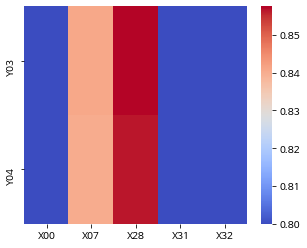

In [78]:
g.heatmap()

In [79]:
g.corr_mean()

X00    0.729033
X07    0.840687
X28    0.857048
X31    0.758593
X32    0.746978
dtype: float64


g1은 평균적으로 X28, X07과 가장 유사하다.  

### x[feat_temp], y_g2

In [80]:
tmp_df = df_y_g2
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07      X28       X31       X32
Y00  0.912809  0.979172  0.97449  0.918779  0.921823


In [81]:
g.df.describe()

,Y00,X00,X07,X28,X31,X32
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,21.324190,19.965602,21.437014,21.898565,19.603796,19.750347
std,4.309451,4.745137,4.423139,4.275935,5.612736,5.345214
min,11.500000,8.300000,11.600000,10.300000,5.300000,5.500000
25%,18.000000,16.500000,18.100000,18.700000,15.700000,16.000000
50%,21.000000,19.500000,20.900000,21.600000,19.100000,19.200000
75%,24.500000,23.800000,24.600000,25.000000,23.900000,23.900000
max,32.000000,30.900000,32.700000,33.200000,33.100000,32.900000


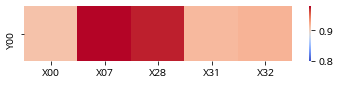

In [82]:
g.heatmap((6, 1))

In [83]:
g.corr_mean()

X00    0.912809
X07    0.979172
X28    0.974490
X31    0.918779
X32    0.921823
dtype: float64


g2는 X7과 X28과 가장 유사하다. 

### x[feat_temp], y_g3

In [84]:
tmp_df = df_y_g3
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y05  0.906096  0.892414  0.864041  0.899776  0.901241
Y08  0.902829  0.897089  0.872612  0.896547  0.894345
Y14  0.911123  0.931548  0.916300  0.915336  0.906674


In [85]:
g.df.describe()

,Y05,Y08,Y14,X00,X07,X28,X31,X32
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,24.165856,24.016898,21.319444,19.965602,21.437014,21.898565,19.603796,19.750347
std,8.589213,9.832279,7.066149,4.745137,4.423139,4.275935,5.612736,5.345214
min,7.500000,7.000000,7.500000,8.300000,11.600000,10.300000,5.300000,5.500000
25%,17.500000,17.000000,16.500000,16.500000,18.100000,18.700000,15.700000,16.000000
50%,22.000000,21.000000,19.500000,19.500000,20.900000,21.600000,19.100000,19.200000
75%,30.000000,29.000000,25.000000,23.800000,24.600000,25.000000,23.900000,23.900000
max,53.000000,54.500000,42.500000,30.900000,32.700000,33.200000,33.100000,32.900000


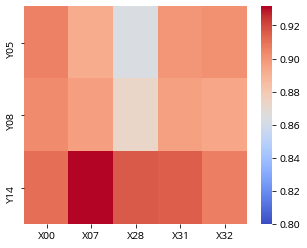

In [86]:
g.heatmap()

In [87]:
g.corr_mean()

X00    0.906683
X07    0.907017
X28    0.884318
X31    0.903886
X32    0.900753
dtype: float64


g3은 평균적으로 4군데와 비슷한 수준으로 유사하다.


### x[feat_temp], y_g4

In [88]:
tmp_df = df_y_g4
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y13  0.951228  0.958731  0.938310  0.950045  0.950898
Y01  0.951641  0.970238  0.953917  0.956140  0.956146
Y02  0.954500  0.973252  0.958521  0.957152  0.960426


In [89]:
g.df.describe()

,Y13,Y01,Y02,X00,X07,X28,X31,X32
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,20.926157,23.664583,23.623611,19.965602,21.437014,21.898565,19.603796,19.750347
std,6.106031,7.566614,7.423344,4.745137,4.423139,4.275935,5.612736,5.345214
min,7.500000,7.000000,7.000000,8.300000,11.600000,10.300000,5.300000,5.500000
25%,16.500000,17.500000,17.500000,16.500000,18.100000,18.700000,15.700000,16.000000
50%,19.500000,22.000000,22.000000,19.500000,20.900000,21.600000,19.100000,19.200000
75%,25.000000,30.000000,29.500000,23.800000,24.600000,25.000000,23.900000,23.900000
max,38.000000,40.500000,39.500000,30.900000,32.700000,33.200000,33.100000,32.900000


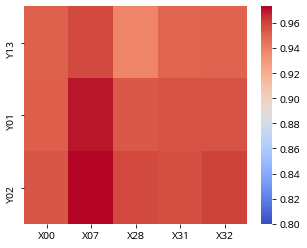

In [90]:
g.heatmap()

In [91]:
g.corr_mean()

X00    0.952456
X07    0.967407
X28    0.950249
X31    0.954445
X32    0.955823
dtype: float64


g4는 평균적으로 모든 지역과 비슷한 수준으로 유사하다. 

### x[feat_temp], y_g5

In [92]:
tmp_df = df_y_g5
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y09  0.947931  0.923403  0.889321  0.947002  0.951074
Y10  0.945833  0.931275  0.899919  0.947893  0.950790
Y11  0.933180  0.911746  0.879923  0.932860  0.936655
Y17  0.911654  0.885659  0.849162  0.905867  0.911813
Y15  0.925800  0.906402  0.874344  0.919587  0.929539
Y16  0.923968  0.891921  0.855365  0.917060  0.923795


In [93]:
g.df.describe()

,Y09,Y10,Y11,Y17,Y15,Y16,X00,X07,X28,X31,X32
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,22.222801,23.737269,24.649653,23.381829,21.564468,22.969097,19.965602,21.437014,21.898565,19.603796,19.750347
std,9.112299,10.599000,12.214870,9.275172,6.810084,8.054272,4.745137,4.423139,4.275935,5.612736,5.345214
min,3.500000,4.000000,3.000000,7.000000,7.000000,6.000000,8.300000,11.600000,10.300000,5.300000,5.500000
25%,15.500000,15.500000,15.000000,16.000000,16.500000,16.500000,16.500000,18.100000,18.700000,15.700000,16.000000
50%,20.000000,20.500000,21.000000,20.000000,20.000000,21.500000,19.500000,20.900000,21.600000,19.100000,19.200000
75%,30.500000,32.500000,34.500000,32.000000,27.000000,30.000000,23.800000,24.600000,25.000000,23.900000,23.900000
max,42.000000,49.000000,53.000000,43.500000,40.500000,41.500000,30.900000,32.700000,33.200000,33.100000,32.900000


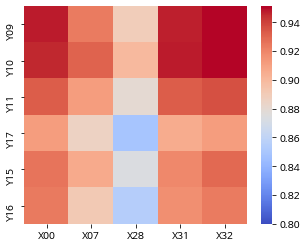

In [94]:
g.heatmap()

In [95]:
g.corr_mean()

X00    0.931394
X07    0.908401
X28    0.874672
X31    0.928378
X32    0.933944
dtype: float64


g5은 평균적으로 X32, X00와 가장 유사하다.  

### x[feat_temp], y_g6

In [96]:
tmp_df = df_y_g6
g = correlation_x_y(tmp_df, df.loc[:n-1, feat_temp])
g.corr()

          X00       X07       X28       X31       X32
Y12  0.825280  0.778135  0.733078  0.817218  0.830264
Y06  0.840827  0.795471  0.752037  0.838379  0.852777
Y07  0.746129  0.698961  0.652907  0.743822  0.763417


In [97]:
g.df.describe()

,Y12,Y06,Y07,X00,X07,X28,X31,X32
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,23.641898,22.530671,23.786574,19.965602,21.437014,21.898565,19.603796,19.750347
std,8.400081,7.468692,8.732548,4.745137,4.423139,4.275935,5.612736,5.345214
min,6.000000,6.500000,7.500000,8.300000,11.600000,10.300000,5.300000,5.500000
25%,17.000000,16.500000,17.000000,16.500000,18.100000,18.700000,15.700000,16.000000
50%,22.000000,21.000000,21.500000,19.500000,20.900000,21.600000,19.100000,19.200000
75%,30.500000,28.500000,29.500000,23.800000,24.600000,25.000000,23.900000,23.900000
max,43.500000,45.000000,52.000000,30.900000,32.700000,33.200000,33.100000,32.900000


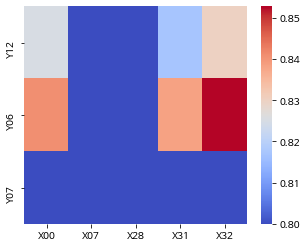

In [98]:
g.heatmap()

In [99]:
g.corr_mean()

X00    0.804078
X07    0.757522
X28    0.712674
X31    0.799806
X32    0.815486
dtype: float64


다른 그룹들 보다는 유사성이 떨어지는 것처럼 보이지만 여전히 0.7이 넘는 높은 상관관계를 갖는다.